In [1]:
import os

import torch

from MResNet import *
from MResNetC import *
from train import *

import seaborn as sns

sns.set()


"""
Code For 
Yiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" 
Thirty-fifth International Conference on Machine Learning (ICML), 2018

@2prime @Aoxiao Zhong

Acknowledgement:
@pppppass(Zhihan Li)
"""
# %load_ext autoreload
# %autoreload 2
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

/home/nox/repos/beyond/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nCode For \nYiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" \nThirty-fifth International Conference on Machine Learning (ICML), 2018\n\n@2prime @Aoxiao Zhong\n\nAcknowledgement:\n@pppppass(Zhihan Li)\n'

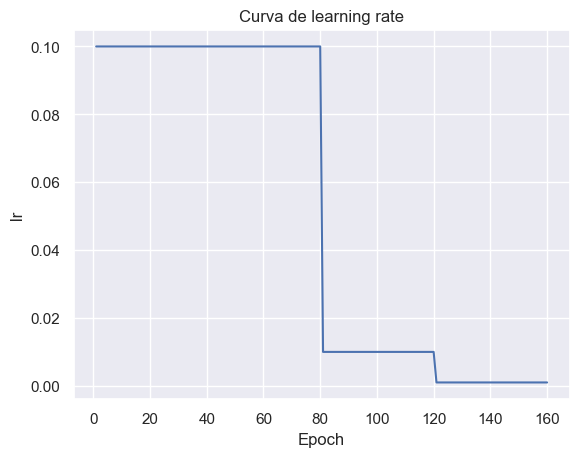

In [2]:
xs = [*range(1,161)]
ys = [lr_control({80: 0.1, 120: 0.01, 160: 0.001},x) for x in xs]

plt.figure()
plt.plot(xs, ys)
plt.title("Curva de learning rate")
plt.ylabel("lr")
plt.xlabel("Epoch")
plt.show()

# Experiments

## LMResNet-164

In [3]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from torchinfo import summary
from blocks import BasicBlock, Bottleneck
from MResNet import MResNet

In [5]:
net = MResNet(Bottleneck, [18,18,18], num_classes=10, pretrain=False)#, stochastic_depth=False)
net.cuda()
model_name = "MResNet164"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    depth=5,
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 86                        --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─Downsample: 1-2                        [128, 16, 32, 32]         [128, 64, 32, 32]         --                        --                        --
│    └─Sequential: 2-1                   [128, 16, 32, 32]         [128, 64, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [6]:
%%time
sgd_para = {"lr": 1e-3, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {80: 0.1, 120: 0.01, 160: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(160):  # 100
    Trainer.train()

391it [01:47,  3.64it/s]

Epoch 1 finished, average loss: 0.0133438113
Starting testing


Correct: 4554, total: 10000, accuracy: 0.4553999901, average loss: 0.0116552045


391it [01:42,  3.83it/s]

Epoch 2 finished, average loss: 0.0095007543
Starting testing


Correct: 6152, total: 10000, accuracy: 0.6151999831, average loss: 0.0085521058


391it [01:39,  3.92it/s]

Epoch 3 finished, average loss: 0.0071967085
Starting testing


Correct: 7109, total: 10000, accuracy: 0.7109000087, average loss: 0.0065622241


391it [01:42,  3.83it/s]

Epoch 4 finished, average loss: 0.0057106712
Starting testing


Correct: 7569, total: 10000, accuracy: 0.7568999529, average loss: 0.0055185930


391it [01:39,  3.93it/s]

Epoch 5 finished, average loss: 0.0048612278
Starting testing


Correct: 7617, total: 10000, accuracy: 0.7616999745, average loss: 0.0053620182


391it [01:41,  3.84it/s]

Epoch 6 finished, average loss: 0.0042909840
Starting testing


Correct: 7791, total: 10000, accuracy: 0.7791000009, average loss: 0.0050330218


391it [01:42,  3.82it/s]

Epoch 7 finished, average loss: 0.0038370953
Starting testing


Correct: 8070, total: 10000, accuracy: 0.8069999814, average loss: 0.0044454381


391it [01:42,  3.82it/s]

Epoch 8 finished, average loss: 0.0034656878
Starting testing


Correct: 8134, total: 10000, accuracy: 0.8133999705, average loss: 0.0042733465


391it [01:41,  3.87it/s]

Epoch 9 finished, average loss: 0.0032237110
Starting testing


Correct: 8283, total: 10000, accuracy: 0.8282999992, average loss: 0.0040336824


391it [01:46,  3.66it/s]

Epoch 10 finished, average loss: 0.0030167077
Starting testing


Correct: 7896, total: 10000, accuracy: 0.7895999551, average loss: 0.0048824947


391it [01:55,  3.38it/s]

Epoch 11 finished, average loss: 0.0028540293
Starting testing


Correct: 8376, total: 10000, accuracy: 0.8375999928, average loss: 0.0037216344


391it [01:43,  3.78it/s]

Epoch 12 finished, average loss: 0.0027165918
Starting testing


Correct: 8612, total: 10000, accuracy: 0.8611999750, average loss: 0.0032098240


391it [01:52,  3.47it/s]

Epoch 13 finished, average loss: 0.0026304637
Starting testing


Correct: 8331, total: 10000, accuracy: 0.8330999613, average loss: 0.0038849602


391it [01:44,  3.72it/s]

Epoch 14 finished, average loss: 0.0024693022
Starting testing


Correct: 8188, total: 10000, accuracy: 0.8187999725, average loss: 0.0043765096


391it [01:40,  3.88it/s]

Epoch 15 finished, average loss: 0.0024232280
Starting testing


Correct: 8623, total: 10000, accuracy: 0.8622999787, average loss: 0.0031267164


391it [01:39,  3.94it/s]

Epoch 16 finished, average loss: 0.0023142402
Starting testing


Correct: 8489, total: 10000, accuracy: 0.8488999605, average loss: 0.0037101373


391it [01:39,  3.95it/s]

Epoch 17 finished, average loss: 0.0021639042
Starting testing


Correct: 8524, total: 10000, accuracy: 0.8524000049, average loss: 0.0035764705


391it [01:39,  3.92it/s]

Epoch 18 finished, average loss: 0.0021560744
Starting testing


Correct: 8430, total: 10000, accuracy: 0.8429999948, average loss: 0.0039488423


391it [01:40,  3.90it/s]

Epoch 19 finished, average loss: 0.0020625771
Starting testing


Correct: 8602, total: 10000, accuracy: 0.8601999879, average loss: 0.0033174914


391it [01:40,  3.90it/s]

Epoch 20 finished, average loss: 0.0020347313
Starting testing


Correct: 8609, total: 10000, accuracy: 0.8608999848, average loss: 0.0032604721


391it [01:37,  4.00it/s]

Epoch 21 finished, average loss: 0.0019526414
Starting testing


Correct: 8693, total: 10000, accuracy: 0.8693000078, average loss: 0.0031845082


391it [01:36,  4.07it/s]

Epoch 22 finished, average loss: 0.0018958221
Starting testing


Correct: 8524, total: 10000, accuracy: 0.8524000049, average loss: 0.0036401326


391it [01:36,  4.07it/s]

Epoch 23 finished, average loss: 0.0019044388
Starting testing


Correct: 8555, total: 10000, accuracy: 0.8554999828, average loss: 0.0036446181


391it [01:35,  4.08it/s]

Epoch 24 finished, average loss: 0.0018552215
Starting testing


Correct: 8698, total: 10000, accuracy: 0.8697999716, average loss: 0.0030779799


391it [01:35,  4.09it/s]

Epoch 25 finished, average loss: 0.0017942114
Starting testing


Correct: 8494, total: 10000, accuracy: 0.8493999839, average loss: 0.0036670593


391it [01:36,  4.07it/s]

Epoch 26 finished, average loss: 0.0017716724
Starting testing


Correct: 8630, total: 10000, accuracy: 0.8629999757, average loss: 0.0033531793


391it [01:36,  4.07it/s]

Epoch 27 finished, average loss: 0.0017329222
Starting testing


Correct: 8680, total: 10000, accuracy: 0.8679999709, average loss: 0.0032178081


391it [01:49,  3.56it/s]

Epoch 28 finished, average loss: 0.0017227530
Starting testing


Correct: 8521, total: 10000, accuracy: 0.8520999551, average loss: 0.0035045997


391it [01:54,  3.41it/s]

Epoch 29 finished, average loss: 0.0016927815
Starting testing


Correct: 8735, total: 10000, accuracy: 0.8734999895, average loss: 0.0030151300


391it [01:54,  3.41it/s]

Epoch 30 finished, average loss: 0.0016474769
Starting testing


Correct: 8755, total: 10000, accuracy: 0.8754999638, average loss: 0.0030503630


391it [01:49,  3.58it/s]

Epoch 31 finished, average loss: 0.0016771522
Starting testing


Correct: 8773, total: 10000, accuracy: 0.8772999644, average loss: 0.0030301407


391it [01:54,  3.41it/s]

Epoch 32 finished, average loss: 0.0016180413
Starting testing


Correct: 8790, total: 10000, accuracy: 0.8789999485, average loss: 0.0028879912


391it [01:50,  3.53it/s]

Epoch 33 finished, average loss: 0.0015600158
Starting testing


Correct: 8715, total: 10000, accuracy: 0.8714999557, average loss: 0.0031049607


391it [01:43,  3.78it/s]

Epoch 34 finished, average loss: 0.0015798860
Starting testing


Correct: 8872, total: 10000, accuracy: 0.8871999979, average loss: 0.0027960187


391it [01:55,  3.38it/s]

Epoch 35 finished, average loss: 0.0015533073
Starting testing


Correct: 8605, total: 10000, accuracy: 0.8604999781, average loss: 0.0035794053


391it [01:55,  3.39it/s]

Epoch 36 finished, average loss: 0.0015224692
Starting testing


Correct: 8923, total: 10000, accuracy: 0.8922999501, average loss: 0.0026112573


391it [01:55,  3.38it/s]

Epoch 37 finished, average loss: 0.0015455892
Starting testing


Correct: 8794, total: 10000, accuracy: 0.8793999553, average loss: 0.0028906429


391it [01:55,  3.39it/s]

Epoch 38 finished, average loss: 0.0014757915
Starting testing


Correct: 8873, total: 10000, accuracy: 0.8872999549, average loss: 0.0027683050


391it [01:55,  3.39it/s]

Epoch 39 finished, average loss: 0.0015034760
Starting testing


Correct: 8756, total: 10000, accuracy: 0.8755999804, average loss: 0.0032003288


391it [01:55,  3.38it/s]

Epoch 40 finished, average loss: 0.0014612660
Starting testing


Correct: 8888, total: 10000, accuracy: 0.8887999654, average loss: 0.0026526650


391it [01:49,  3.58it/s]

Epoch 41 finished, average loss: 0.0014809245
Starting testing


Correct: 8913, total: 10000, accuracy: 0.8912999630, average loss: 0.0025851122


391it [01:39,  3.91it/s]

Epoch 42 finished, average loss: 0.0014073305
Starting testing


Correct: 8893, total: 10000, accuracy: 0.8892999887, average loss: 0.0027057910


391it [01:40,  3.90it/s]

Epoch 43 finished, average loss: 0.0014109382
Starting testing


Correct: 8834, total: 10000, accuracy: 0.8833999634, average loss: 0.0029703176


391it [01:49,  3.56it/s]

Epoch 44 finished, average loss: 0.0014093878
Starting testing


Correct: 8630, total: 10000, accuracy: 0.8629999757, average loss: 0.0035708188


391it [01:43,  3.79it/s]

Epoch 45 finished, average loss: 0.0013936755
Starting testing


Correct: 8832, total: 10000, accuracy: 0.8831999898, average loss: 0.0029945733


391it [01:47,  3.65it/s]

Epoch 46 finished, average loss: 0.0014332408
Starting testing


Correct: 8749, total: 10000, accuracy: 0.8748999834, average loss: 0.0032486527


391it [01:54,  3.40it/s]

Epoch 47 finished, average loss: 0.0013456835
Starting testing


Correct: 8793, total: 10000, accuracy: 0.8792999983, average loss: 0.0029240365


391it [01:48,  3.60it/s]

Epoch 48 finished, average loss: 0.0013773385
Starting testing


Correct: 8925, total: 10000, accuracy: 0.8924999833, average loss: 0.0027067158


391it [01:44,  3.73it/s]

Epoch 49 finished, average loss: 0.0013591993
Starting testing


Correct: 8856, total: 10000, accuracy: 0.8855999708, average loss: 0.0029362552


391it [01:42,  3.82it/s]

Epoch 50 finished, average loss: 0.0013448861
Starting testing


Correct: 9008, total: 10000, accuracy: 0.9007999897, average loss: 0.0025340244


391it [01:54,  3.41it/s]

Epoch 51 finished, average loss: 0.0013284186
Starting testing


Correct: 8838, total: 10000, accuracy: 0.8837999701, average loss: 0.0029071629


391it [01:55,  3.38it/s]

Epoch 52 finished, average loss: 0.0013111519
Starting testing


Correct: 8889, total: 10000, accuracy: 0.8888999820, average loss: 0.0027949632


391it [01:55,  3.37it/s]

Epoch 53 finished, average loss: 0.0013036933
Starting testing


Correct: 8687, total: 10000, accuracy: 0.8686999679, average loss: 0.0033566078


391it [01:55,  3.38it/s]

Epoch 54 finished, average loss: 0.0012876691
Starting testing


Correct: 8628, total: 10000, accuracy: 0.8628000021, average loss: 0.0036991415


391it [01:47,  3.63it/s]

Epoch 55 finished, average loss: 0.0012803775
Starting testing


Correct: 8906, total: 10000, accuracy: 0.8905999660, average loss: 0.0026186180


391it [01:52,  3.48it/s]

Epoch 56 finished, average loss: 0.0012983602
Starting testing


Correct: 9013, total: 10000, accuracy: 0.9012999535, average loss: 0.0025725892


391it [01:46,  3.65it/s]

Epoch 57 finished, average loss: 0.0012349015
Starting testing


Correct: 8949, total: 10000, accuracy: 0.8948999643, average loss: 0.0025861242


391it [01:53,  3.46it/s]

Epoch 58 finished, average loss: 0.0012990817
Starting testing


Correct: 9025, total: 10000, accuracy: 0.9024999738, average loss: 0.0023764648


391it [01:51,  3.51it/s]

Epoch 59 finished, average loss: 0.0012592797
Starting testing


Correct: 8988, total: 10000, accuracy: 0.8987999558, average loss: 0.0025337226


391it [01:46,  3.67it/s]

Epoch 60 finished, average loss: 0.0011877649
Starting testing


Correct: 8759, total: 10000, accuracy: 0.8758999705, average loss: 0.0032074679


391it [01:56,  3.36it/s]

Epoch 61 finished, average loss: 0.0012531433
Starting testing


Correct: 8936, total: 10000, accuracy: 0.8935999870, average loss: 0.0026666367


391it [01:53,  3.44it/s]

Epoch 62 finished, average loss: 0.0012375470
Starting testing


Correct: 8739, total: 10000, accuracy: 0.8738999963, average loss: 0.0032605089


391it [01:46,  3.67it/s]

Epoch 63 finished, average loss: 0.0012662024
Starting testing


Correct: 8893, total: 10000, accuracy: 0.8892999887, average loss: 0.0027746484


391it [01:39,  3.93it/s]

Epoch 64 finished, average loss: 0.0011692244
Starting testing


Correct: 8875, total: 10000, accuracy: 0.8874999881, average loss: 0.0029237071


391it [01:39,  3.93it/s]

Epoch 65 finished, average loss: 0.0012033646
Starting testing


Correct: 9026, total: 10000, accuracy: 0.9025999904, average loss: 0.0024466116


391it [01:39,  3.93it/s]

Epoch 66 finished, average loss: 0.0011740428
Starting testing


Correct: 9007, total: 10000, accuracy: 0.9006999731, average loss: 0.0025915690


391it [01:39,  3.94it/s]

Epoch 67 finished, average loss: 0.0012263476
Starting testing


Correct: 8722, total: 10000, accuracy: 0.8721999526, average loss: 0.0033324285


391it [01:39,  3.93it/s]

Epoch 68 finished, average loss: 0.0011683068
Starting testing


Correct: 8921, total: 10000, accuracy: 0.8920999765, average loss: 0.0027438452


391it [01:38,  3.98it/s]

Epoch 69 finished, average loss: 0.0011631491
Starting testing


Correct: 9030, total: 10000, accuracy: 0.9029999971, average loss: 0.0023410513


391it [01:36,  4.07it/s]

Epoch 70 finished, average loss: 0.0011658867
Starting testing


Correct: 8929, total: 10000, accuracy: 0.8928999901, average loss: 0.0026586025


391it [01:36,  4.07it/s]

Epoch 71 finished, average loss: 0.0011729243
Starting testing


Correct: 9039, total: 10000, accuracy: 0.9038999677, average loss: 0.0024244039


391it [01:36,  4.07it/s]

Epoch 72 finished, average loss: 0.0011562705
Starting testing


Correct: 8933, total: 10000, accuracy: 0.8932999969, average loss: 0.0026375838


391it [01:36,  4.07it/s]

Epoch 73 finished, average loss: 0.0011521033
Starting testing


Correct: 9025, total: 10000, accuracy: 0.9024999738, average loss: 0.0023964897


391it [01:36,  4.07it/s]

Epoch 74 finished, average loss: 0.0011185686
Starting testing


Correct: 8889, total: 10000, accuracy: 0.8888999820, average loss: 0.0028019088


391it [01:36,  4.07it/s]

Epoch 75 finished, average loss: 0.0011286470
Starting testing


Correct: 8836, total: 10000, accuracy: 0.8835999966, average loss: 0.0029620260


391it [01:36,  4.07it/s]

Epoch 76 finished, average loss: 0.0011448318
Starting testing


Correct: 8955, total: 10000, accuracy: 0.8955000043, average loss: 0.0025514248


391it [01:36,  4.07it/s]

Epoch 77 finished, average loss: 0.0011390654
Starting testing


Correct: 8981, total: 10000, accuracy: 0.8980999589, average loss: 0.0025898647


391it [01:36,  4.07it/s]

Epoch 78 finished, average loss: 0.0011084863
Starting testing


Correct: 8933, total: 10000, accuracy: 0.8932999969, average loss: 0.0026776646


391it [01:36,  4.07it/s]

Epoch 79 finished, average loss: 0.0011179043
Starting testing


Correct: 8862, total: 10000, accuracy: 0.8861999512, average loss: 0.0029943592


391it [01:36,  4.07it/s]

Epoch 80 finished, average loss: 0.0010918257
Starting testing


Correct: 8954, total: 10000, accuracy: 0.8953999877, average loss: 0.0028031441


391it [01:36,  4.07it/s]

Epoch 81 finished, average loss: 0.0005179429
Starting testing


Correct: 9338, total: 10000, accuracy: 0.9337999821, average loss: 0.0015802024


391it [01:36,  4.07it/s]

Epoch 82 finished, average loss: 0.0003129076
Starting testing


Correct: 9360, total: 10000, accuracy: 0.9359999895, average loss: 0.0015522748


391it [01:36,  4.07it/s]

Epoch 83 finished, average loss: 0.0002300657
Starting testing


Correct: 9367, total: 10000, accuracy: 0.9366999865, average loss: 0.0015419992


391it [01:36,  4.07it/s]

Epoch 84 finished, average loss: 0.0002010700
Starting testing


Correct: 9381, total: 10000, accuracy: 0.9380999804, average loss: 0.0015710815


391it [01:36,  4.07it/s]

Epoch 85 finished, average loss: 0.0001755502
Starting testing


Correct: 9383, total: 10000, accuracy: 0.9382999539, average loss: 0.0015885059


391it [01:36,  4.07it/s]

Epoch 86 finished, average loss: 0.0001601134
Starting testing


Correct: 9379, total: 10000, accuracy: 0.9378999472, average loss: 0.0015964475


391it [01:36,  4.07it/s]

Epoch 87 finished, average loss: 0.0001373103
Starting testing


Correct: 9393, total: 10000, accuracy: 0.9393000007, average loss: 0.0016212116


391it [01:35,  4.07it/s]

Epoch 88 finished, average loss: 0.0001241789
Starting testing


Correct: 9397, total: 10000, accuracy: 0.9396999478, average loss: 0.0016355040


391it [01:36,  4.07it/s]

Epoch 89 finished, average loss: 0.0001138693
Starting testing


Correct: 9383, total: 10000, accuracy: 0.9382999539, average loss: 0.0016510769


391it [01:36,  4.07it/s]

Epoch 90 finished, average loss: 0.0001080688
Starting testing


Correct: 9383, total: 10000, accuracy: 0.9382999539, average loss: 0.0017194742


391it [01:36,  4.07it/s]

Epoch 91 finished, average loss: 0.0000958983
Starting testing


Correct: 9392, total: 10000, accuracy: 0.9391999841, average loss: 0.0016680253


391it [01:36,  4.07it/s]

Epoch 92 finished, average loss: 0.0000886353
Starting testing


Correct: 9401, total: 10000, accuracy: 0.9400999546, average loss: 0.0016691336


391it [01:36,  4.07it/s]

Epoch 93 finished, average loss: 0.0000806793
Starting testing


Correct: 9396, total: 10000, accuracy: 0.9395999908, average loss: 0.0017028592


391it [01:35,  4.07it/s]

Epoch 94 finished, average loss: 0.0000743670
Starting testing


Correct: 9410, total: 10000, accuracy: 0.9409999847, average loss: 0.0017103058


391it [01:36,  4.07it/s]

Epoch 95 finished, average loss: 0.0000688422
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0017215194


391it [01:36,  4.07it/s]

Epoch 96 finished, average loss: 0.0000619587
Starting testing


Correct: 9403, total: 10000, accuracy: 0.9402999878, average loss: 0.0017403773


391it [01:36,  4.07it/s]

Epoch 97 finished, average loss: 0.0000625402
Starting testing


Correct: 9404, total: 10000, accuracy: 0.9404000044, average loss: 0.0017459872


391it [01:36,  4.07it/s]

Epoch 98 finished, average loss: 0.0000552678
Starting testing


Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0017474356


391it [01:36,  4.07it/s]

Epoch 99 finished, average loss: 0.0000549792
Starting testing


Correct: 9408, total: 10000, accuracy: 0.9407999516, average loss: 0.0018015808


391it [01:36,  4.07it/s]

Epoch 100 finished, average loss: 0.0000505966
Starting testing


Correct: 9410, total: 10000, accuracy: 0.9409999847, average loss: 0.0017858096


391it [01:36,  4.07it/s]

Epoch 101 finished, average loss: 0.0000470223
Starting testing


Correct: 9407, total: 10000, accuracy: 0.9406999946, average loss: 0.0018103860


391it [01:36,  4.07it/s]

Epoch 102 finished, average loss: 0.0000455678
Starting testing


Correct: 9414, total: 10000, accuracy: 0.9413999915, average loss: 0.0017965256


391it [01:36,  4.07it/s]

Epoch 103 finished, average loss: 0.0000485979
Starting testing


Correct: 9407, total: 10000, accuracy: 0.9406999946, average loss: 0.0018515671


391it [01:36,  4.07it/s]

Epoch 104 finished, average loss: 0.0000423829
Starting testing


Correct: 9409, total: 10000, accuracy: 0.9408999681, average loss: 0.0018540682


391it [01:36,  4.07it/s]

Epoch 105 finished, average loss: 0.0000434434
Starting testing


Correct: 9414, total: 10000, accuracy: 0.9413999915, average loss: 0.0018152662


391it [01:36,  4.07it/s]

Epoch 106 finished, average loss: 0.0000385082
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0018481684


391it [01:35,  4.07it/s]

Epoch 107 finished, average loss: 0.0000366101
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0018219745


391it [01:36,  4.07it/s]

Epoch 108 finished, average loss: 0.0000379019
Starting testing


Correct: 9422, total: 10000, accuracy: 0.9422000051, average loss: 0.0018551743


391it [01:35,  4.08it/s]

Epoch 109 finished, average loss: 0.0000387960
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0018285514


391it [01:36,  4.07it/s]

Epoch 110 finished, average loss: 0.0000350388
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0018669215


391it [01:36,  4.07it/s]

Epoch 111 finished, average loss: 0.0000339603
Starting testing


Correct: 9419, total: 10000, accuracy: 0.9418999553, average loss: 0.0018462437


391it [01:36,  4.07it/s]

Epoch 112 finished, average loss: 0.0000340323
Starting testing


Correct: 9415, total: 10000, accuracy: 0.9414999485, average loss: 0.0018716462


391it [01:36,  4.07it/s]

Epoch 113 finished, average loss: 0.0000293659
Starting testing


Correct: 9427, total: 10000, accuracy: 0.9426999688, average loss: 0.0018528046


391it [01:36,  4.07it/s]

Epoch 114 finished, average loss: 0.0000300321
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0018705101


391it [01:36,  4.07it/s]

Epoch 115 finished, average loss: 0.0000292313
Starting testing


Correct: 9412, total: 10000, accuracy: 0.9411999583, average loss: 0.0018798754


391it [01:36,  4.07it/s]

Epoch 116 finished, average loss: 0.0000287247
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0018771688


391it [01:36,  4.07it/s]

Epoch 117 finished, average loss: 0.0000282314
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0018701846


391it [01:36,  4.07it/s]

Epoch 118 finished, average loss: 0.0000295839
Starting testing


Correct: 9418, total: 10000, accuracy: 0.9417999983, average loss: 0.0018851101


391it [01:36,  4.07it/s]

Epoch 119 finished, average loss: 0.0000272157
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0018634823


391it [01:36,  4.07it/s]

Epoch 120 finished, average loss: 0.0000231017
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0018741516


391it [01:36,  4.07it/s]

Epoch 121 finished, average loss: 0.0000263383
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0018906625


391it [01:35,  4.07it/s]

Epoch 122 finished, average loss: 0.0000233057
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0018737313


391it [01:36,  4.07it/s]

Epoch 123 finished, average loss: 0.0000208601
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0018852545


391it [01:35,  4.07it/s]

Epoch 124 finished, average loss: 0.0000222004
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0018666510


391it [01:36,  4.07it/s]

Epoch 125 finished, average loss: 0.0000239166
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0018568871


391it [01:36,  4.07it/s]

Epoch 126 finished, average loss: 0.0000203097
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0018531408


391it [01:35,  4.08it/s]

Epoch 127 finished, average loss: 0.0000217999
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0018676478


391it [01:36,  4.07it/s]

Epoch 128 finished, average loss: 0.0000210381
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0018581457


391it [01:36,  4.07it/s]

Epoch 129 finished, average loss: 0.0000213519
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0018663386


391it [01:36,  4.07it/s]

Epoch 130 finished, average loss: 0.0000207957
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0018657916


391it [01:35,  4.08it/s]

Epoch 131 finished, average loss: 0.0000195297
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0018554344


391it [01:36,  4.07it/s]

Epoch 132 finished, average loss: 0.0000198688
Starting testing


Correct: 9432, total: 10000, accuracy: 0.9431999922, average loss: 0.0018654975


391it [01:36,  4.07it/s]

Epoch 133 finished, average loss: 0.0000195021
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0018608441


391it [01:36,  4.07it/s]

Epoch 134 finished, average loss: 0.0000194525
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0018603413


391it [01:36,  4.06it/s]

Epoch 135 finished, average loss: 0.0000197146
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018586676


391it [01:36,  4.07it/s]

Epoch 136 finished, average loss: 0.0000187747
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0018490912


391it [01:35,  4.07it/s]

Epoch 137 finished, average loss: 0.0000189232
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0018646764


391it [01:35,  4.07it/s]

Epoch 138 finished, average loss: 0.0000175387
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0018661412


391it [01:36,  4.07it/s]

Epoch 139 finished, average loss: 0.0000177571
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018736863


391it [01:36,  4.07it/s]

Epoch 140 finished, average loss: 0.0000171709
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0018637218


391it [01:36,  4.07it/s]

Epoch 141 finished, average loss: 0.0000200562
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018745314


391it [01:35,  4.07it/s]

Epoch 142 finished, average loss: 0.0000187795
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0018691050


391it [01:36,  4.07it/s]

Epoch 143 finished, average loss: 0.0000189348
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0018675007


391it [01:36,  4.07it/s]

Epoch 144 finished, average loss: 0.0000188201
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0018531013


391it [01:36,  4.07it/s]

Epoch 145 finished, average loss: 0.0000198828
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0018660905


391it [01:36,  4.07it/s]

Epoch 146 finished, average loss: 0.0000169236
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0018717125


391it [01:36,  4.07it/s]

Epoch 147 finished, average loss: 0.0000169484
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0018583567


391it [01:36,  4.07it/s]

Epoch 148 finished, average loss: 0.0000183795
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0018721054


391it [01:35,  4.08it/s]

Epoch 149 finished, average loss: 0.0000191429
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0018624713


391it [01:36,  4.07it/s]

Epoch 150 finished, average loss: 0.0000183932
Starting testing


Correct: 9444, total: 10000, accuracy: 0.9443999529, average loss: 0.0018711947


391it [01:36,  4.07it/s]

Epoch 151 finished, average loss: 0.0000168058
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0018921080


391it [01:36,  4.07it/s]

Epoch 152 finished, average loss: 0.0000177466
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018636388


391it [01:36,  4.07it/s]

Epoch 153 finished, average loss: 0.0000164801
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018555913


391it [01:35,  4.07it/s]

Epoch 154 finished, average loss: 0.0000175179
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0018704017


391it [01:35,  4.07it/s]

Epoch 155 finished, average loss: 0.0000181966
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0018627283


391it [01:36,  4.06it/s]

Epoch 156 finished, average loss: 0.0000175100
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0018677211


391it [01:36,  4.07it/s]

Epoch 157 finished, average loss: 0.0000174254
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0018554973


391it [01:36,  4.07it/s]

Epoch 158 finished, average loss: 0.0000173121
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0018702960


391it [01:36,  4.07it/s]

Epoch 159 finished, average loss: 0.0000161484
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0018655721


391it [01:36,  4.07it/s]

Epoch 160 finished, average loss: 0.0000171237
Starting testing


Correct: 9439, total: 10000, accuracy: 0.9438999891, average loss: 0.0018655383
CPU times: user 2h 49min 45s, sys: 1h 51min 36s, total: 4h 41min 22s
Wall time: 4h 43min 48s


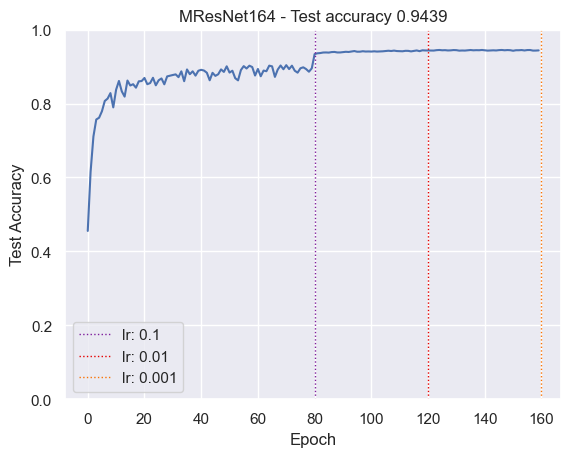

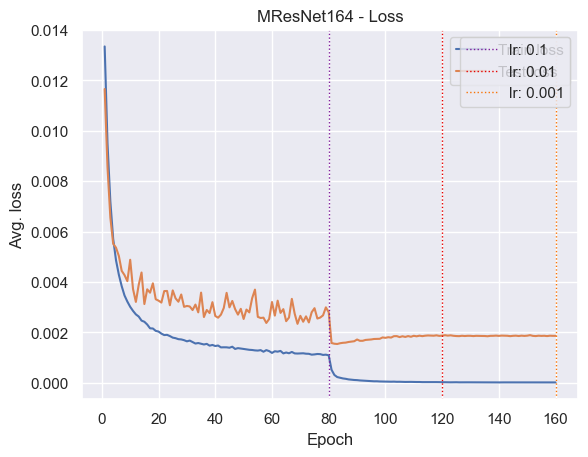

In [7]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet164 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [8]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n") 